In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'object']].describe().to_html()))

In [4]:
landslide = pd.read_csv('landslide_database.csv')
slide = landslide[landslide['SLIDE'] == 1]
noslide = landslide[landslide['SLIDE'] == 0]

In [5]:
slide.describe()

,SLIDE,Long,Lat,maxdewpti,maxhumidity,maxpressurei,maxtempi,maxwspdi,mindewpti,minhumidity,minpressurei,mintempi,Root_Moist,Precip_Mon,Soil_Moist,Soil_Moist_Depth,Soil_Temp,Vegetation,Slope,COVERAGE
count,1283,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000
mean,1,-123.037940,44.874037,49.816836,90.516758,30.129727,67.011691,14.195635,41.116913,49.790335,29.959906,46.259548,513.913233,126.208622,26.420588,26.987053,283.208664,0.741627,24.426847,35.534684
std,0,1.091403,1.143348,6.630895,10.318424,0.191069,13.660721,6.405797,7.162612,20.041817,0.216400,8.047275,154.397384,152.177436,4.985534,5.192776,3.828304,0.223122,9.639984,15.117615
min,1,-124.474159,42.010690,26.000000,49.000000,29.560000,37.000000,0.000000,12.000000,8.000000,29.030000,21.000000,15.076901,0.140800,8.483700,8.480000,271.710020,0.063000,0.000000,11.000000
25%,1,-123.891741,44.133442,45.000000,87.000000,29.990000,55.000000,9.000000,37.000000,32.000000,29.830000,41.000000,443.278800,13.388800,24.440600,24.970000,280.340000,0.585000,17.200900,21.000000
50%,1,-123.252269,45.334509,52.000000,93.000000,30.130000,67.000000,13.000000,43.000000,49.000000,29.950000,46.000000,533.992200,63.552000,25.765700,26.920000,284.610020,0.830000,23.339830,42.000000
75%,1,-122.645735,45.718410,55.000000,100.000000,30.250000,78.000000,18.000000,45.000000,67.000000,30.090000,51.000000,622.841500,174.496000,30.394299,30.755000,285.430000,0.939000,30.567470,43.000000
max,1,-117.154209,46.193292,65.000000,100.000000,30.640000,96.000000,35.000000,61.000000,93.000000,30.540000,68.000000,757.980470,693.401600,36.707200,39.070000,296.320000,0.990000,65.167010,95.000000


In [6]:
describe_categorical(slide)

,UNIQUE_ID,DATE,precipi,MAP_UNIT_L,MAP_UNIT_N,GEO_GENL_U,AGE_NAME,TERRANE_GR,FORMATION,G_ROCK_TYP,GN_LITH_TY
count,1283,1283,1283,1283,1283,1283,1283,1283,1283,1283,1283
unique,1283,188,46,204,225,12,16,35,70,32,8
top,LS_2276,8/23/10 0:00,0,Tn,Nestucca Formation,marine sedimentary rocks,Eocene,Quaternary surficial deposits,No data,basalt,sedimentary
freq,1,90,735,85,101,518,345,203,280,243,545


In [7]:
noslide.describe()

,SLIDE,Long,Lat,maxdewpti,maxhumidity,maxpressurei,maxtempi,maxwspdi,mindewpti,minhumidity,minpressurei,mintempi,Root_Moist,Precip_Mon,Soil_Moist,Soil_Moist_Depth,Soil_Temp,Vegetation,Slope,COVERAGE
count,1148,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,0,-122.620556,44.824988,49.013066,90.091463,30.141611,68.695122,13.968641,39.383275,45.191638,29.978249,45.387631,459.596117,84.044771,24.748246,25.556350,282.150242,0.688112,20.934783,47.923345
std,0,1.359832,1.165902,7.706857,9.334779,0.170927,15.695536,5.136572,8.446217,20.813278,0.201138,8.686164,178.505760,117.652297,5.773818,6.225932,21.009557,0.274305,10.851316,12.405291
min,0,-124.093577,42.112966,32.000000,60.000000,29.730000,37.000000,0.000000,18.000000,8.000000,29.370000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,0,-123.467118,44.247550,42.000000,86.000000,30.030000,56.000000,9.000000,34.000000,26.750000,29.880000,39.000000,407.184000,7.436800,22.885150,23.417500,280.300000,0.491000,12.244030,42.000000
50%,0,-123.160024,45.276134,50.000000,93.000000,30.140000,69.000000,15.000000,40.000000,42.000000,29.950000,46.000000,525.888060,26.848000,25.600900,25.630000,284.850040,0.797000,20.187780,43.000000
75%,0,-122.432680,45.694688,55.000000,100.000000,30.220000,82.000000,17.000000,45.000000,62.000000,30.070000,51.000000,562.314450,119.398400,28.499899,29.607500,286.250030,0.930000,28.381045,52.000000
max,0,-118.219724,46.187334,65.000000,100.000000,30.570000,95.000000,34.000000,61.000000,87.000000,30.460000,68.000000,733.039860,693.401600,34.850700,39.070000,294.410000,0.990000,74.572320,82.000000


In [8]:
describe_categorical(noslide)

,UNIQUE_ID,DATE,precipi,MAP_UNIT_L,MAP_UNIT_N,GEO_GENL_U,AGE_NAME,TERRANE_GR,FORMATION,G_ROCK_TYP,GN_LITH_TY
count,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148
unique,1148,124,30,197,214,11,16,35,63,35,8
top,NLS_1121,7/8/08 0:00,0,Ttv,Tillamook Volcanics,volcanic rocks,Eocene,Columbia River Basalt Group,No data,basalt,volcanic
freq,1,43,776,44,44,413,349,182,312,377,557


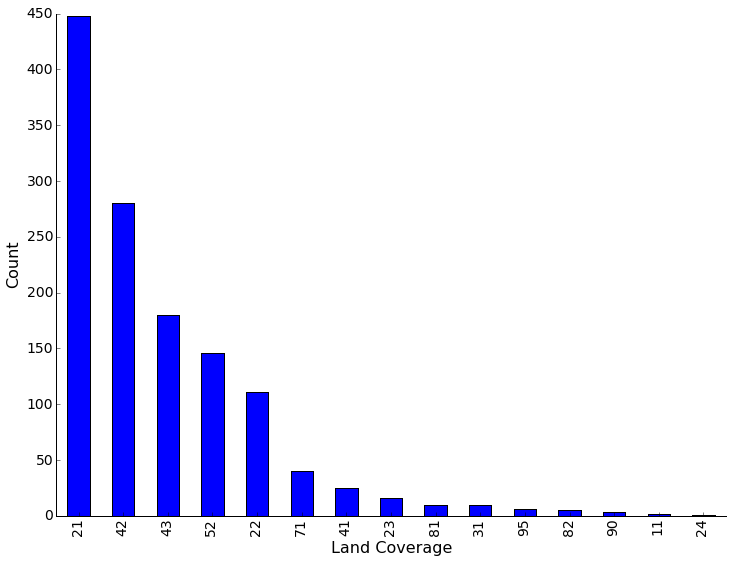

In [28]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
 
plt.xlabel("Land Coverage", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
  
pd.value_counts(slide['COVERAGE']).plot(kind='bar')

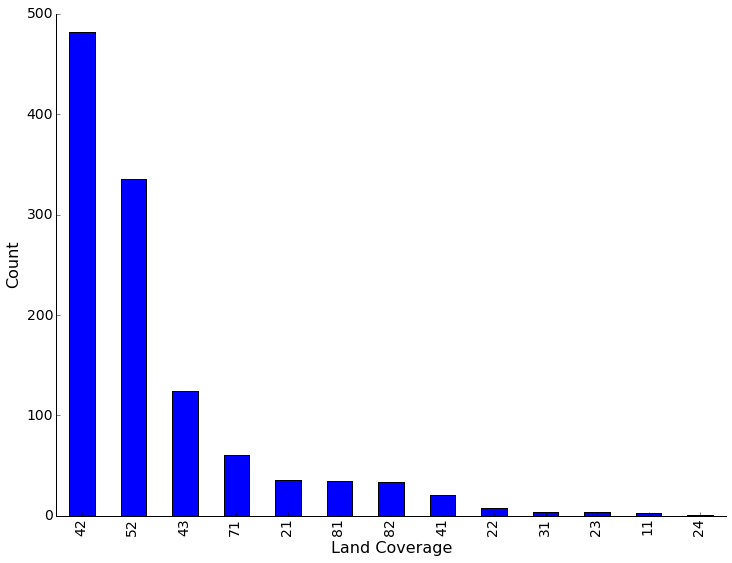

In [29]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Land Coverage", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
  
pd.value_counts(noslide['COVERAGE']).plot(kind='bar')

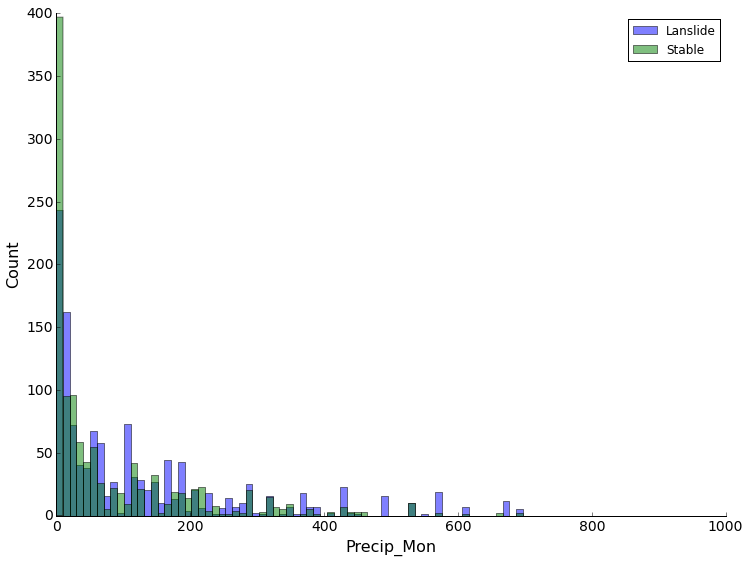

In [44]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Precip_Mon", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 1000, 100)

plt.hist(slide['Precip_Mon'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['Precip_Mon'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

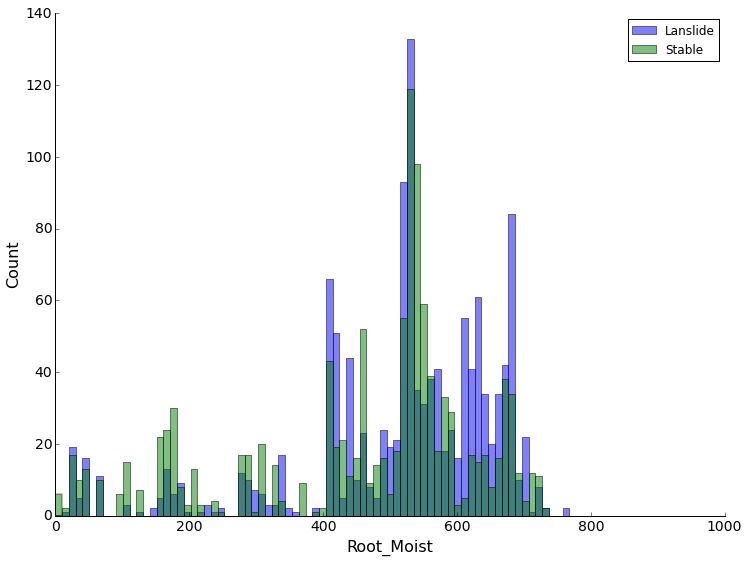

In [46]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Root_Moist", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 1000, 100)

plt.hist(slide['Root_Moist'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['Root_Moist'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

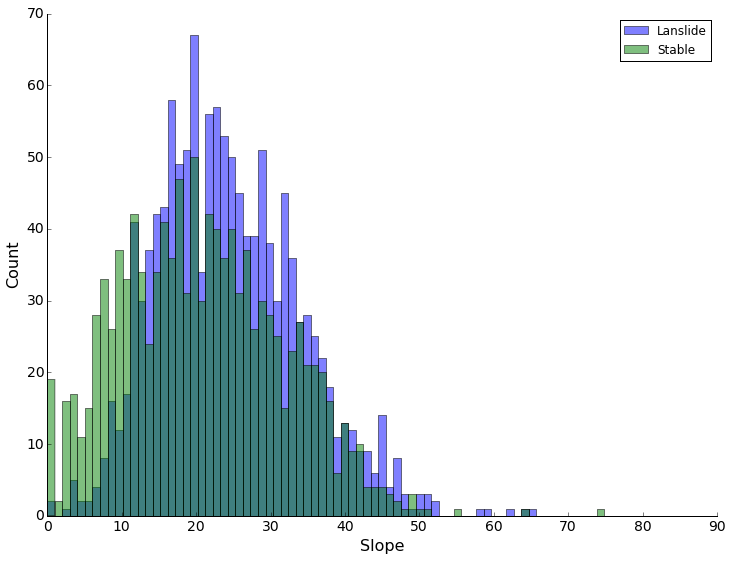

In [48]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Slope", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 90, 90)

plt.hist(slide['Slope'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['Slope'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

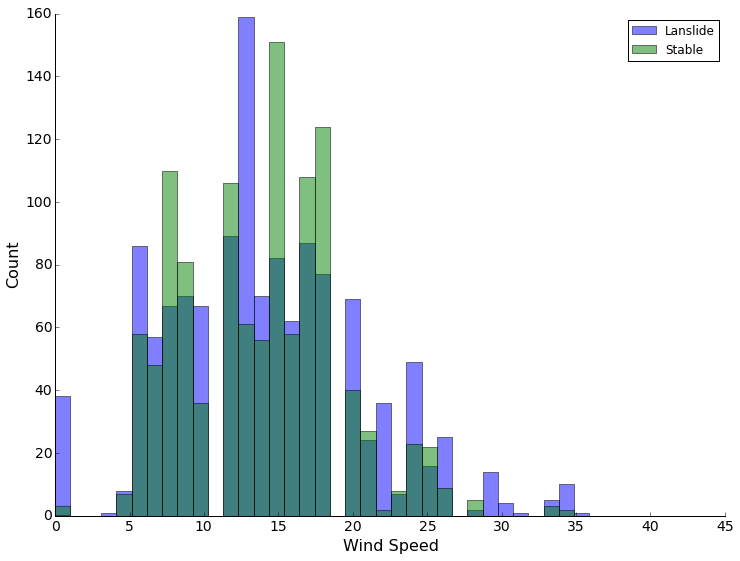

In [49]:

#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Wind Speed", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 40, 40)

plt.hist(slide['maxwspdi'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['maxwspdi'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

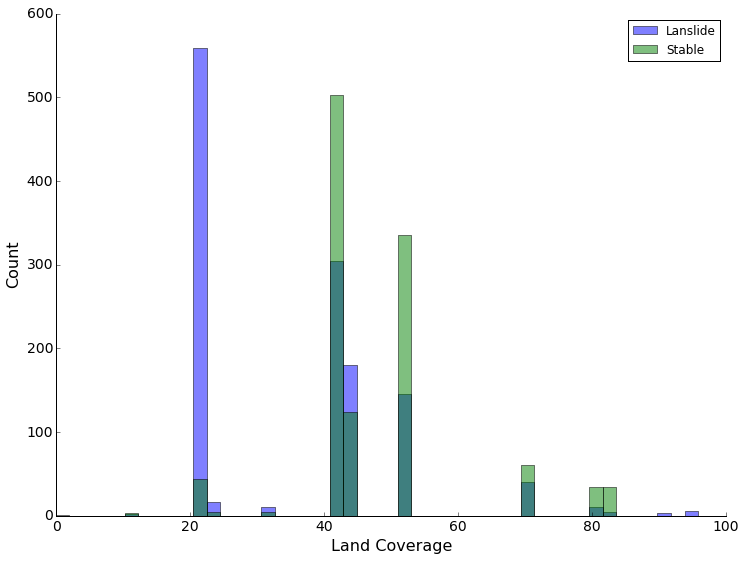

In [53]:

#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Land Coverage", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 100, 50)

plt.hist(slide['COVERAGE'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['COVERAGE'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

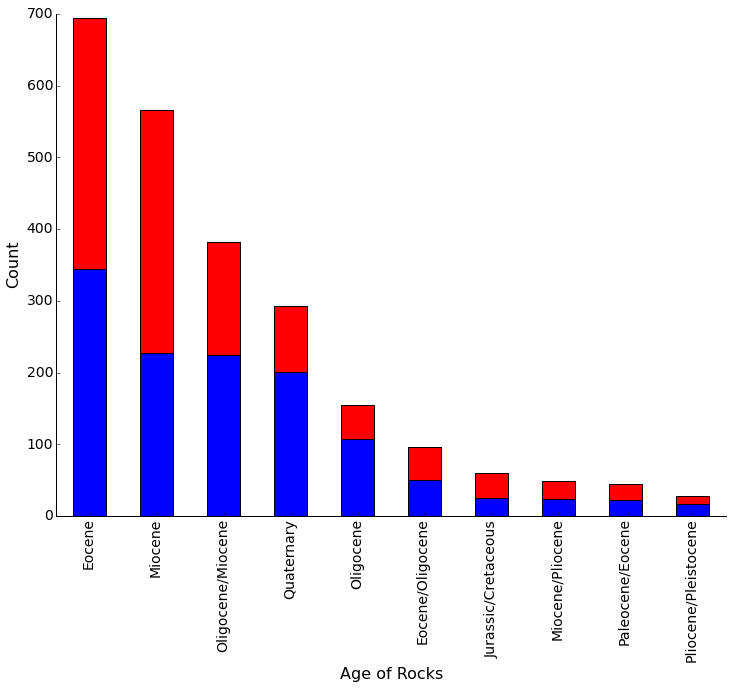

In [65]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
 
plt.xlabel("Age of Rocks", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
  
pd.value_counts(slide['AGE_NAME']).head(10).plot(kind='bar')
pd.value_counts(noslide['AGE_NAME']).head(10).plot(kind='bar',bottom=pd.value_counts(slide['AGE_NAME']).head(10),color='r')

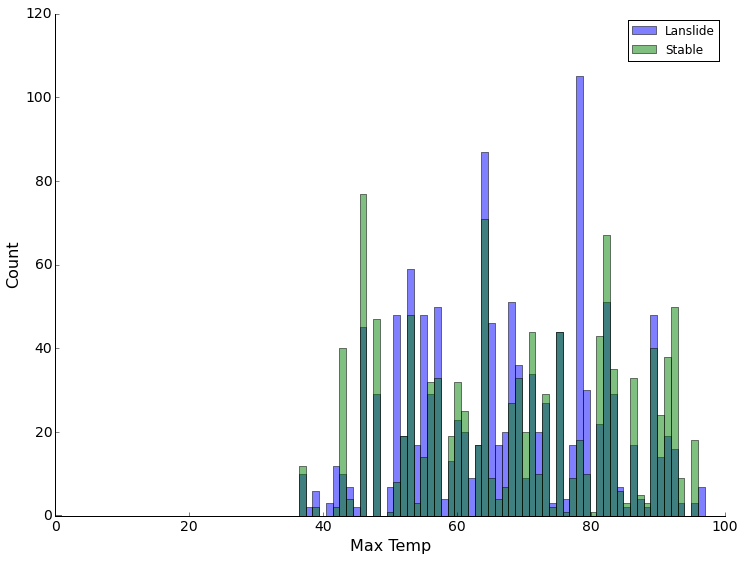

In [68]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Max Temp", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 100, 100)

plt.hist(slide['maxtempi'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['maxtempi'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

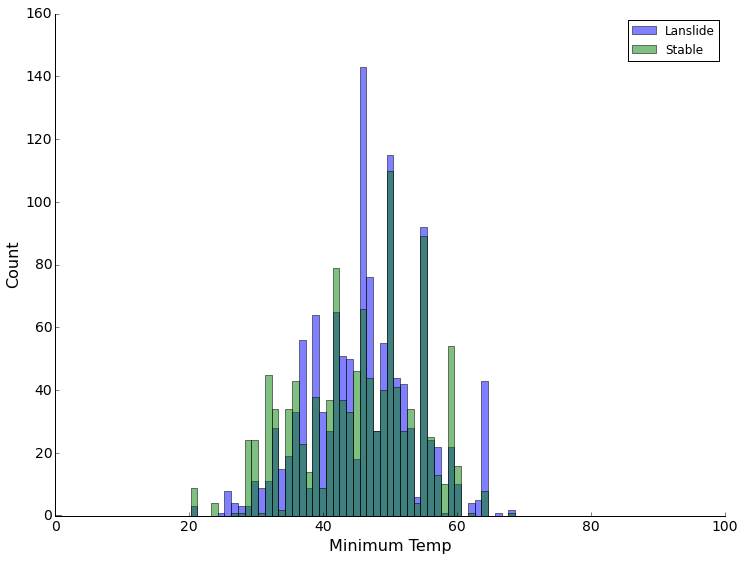

In [70]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Minimum Temp", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 100, 100)

plt.hist(slide['mintempi'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['mintempi'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

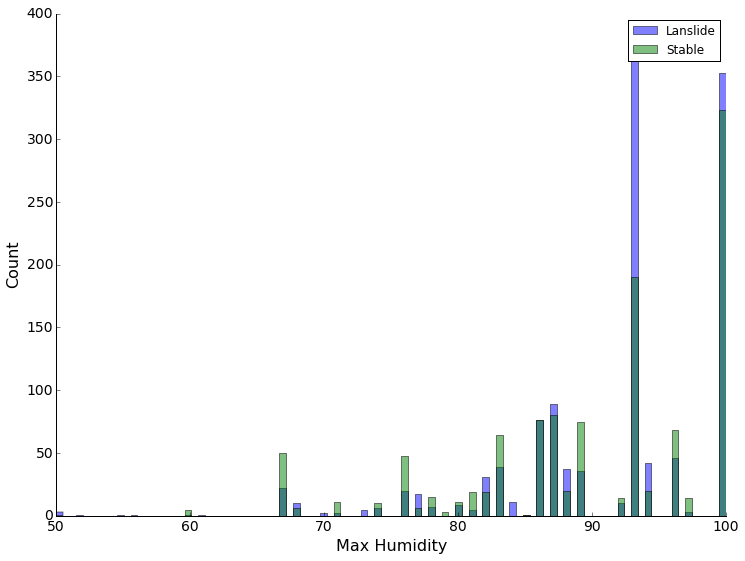

In [73]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Max Humidity", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(50, 100, 100)

plt.hist(slide['maxhumidity'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['maxhumidity'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

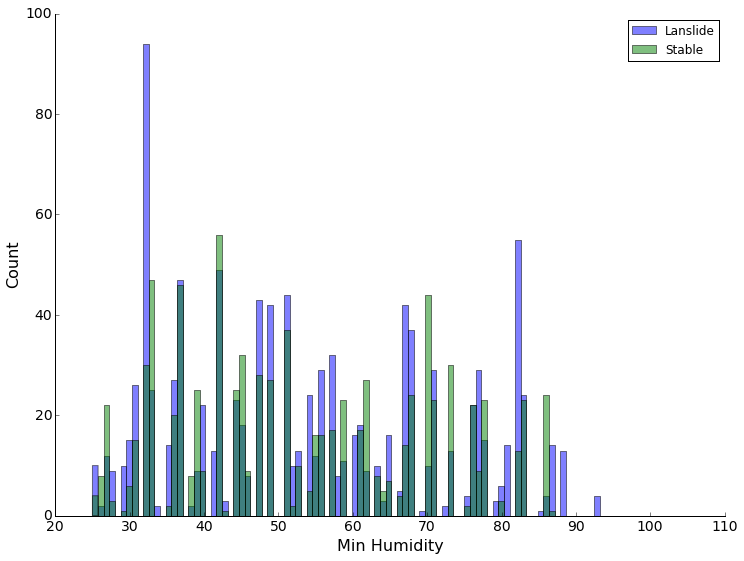

In [76]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Min Humidity", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(25, 100, 100)

plt.hist(slide['minhumidity'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['minhumidity'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

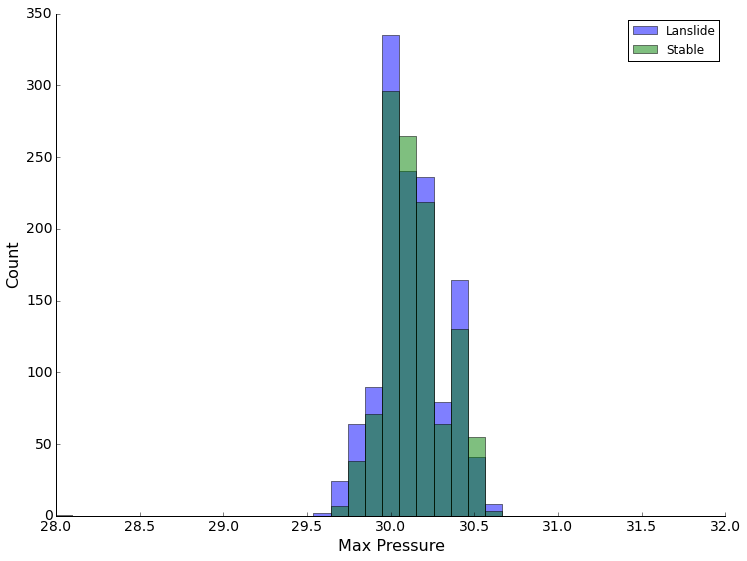

In [78]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Max Pressure", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(28, 32, 40)

plt.hist(slide['maxpressurei'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['maxpressurei'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

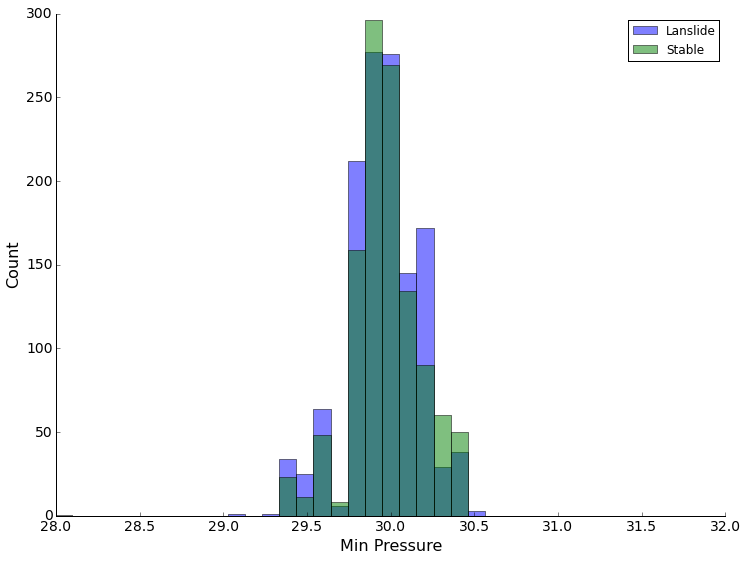

In [79]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Min Pressure", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(28, 32, 40)

plt.hist(slide['minpressurei'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['minpressurei'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

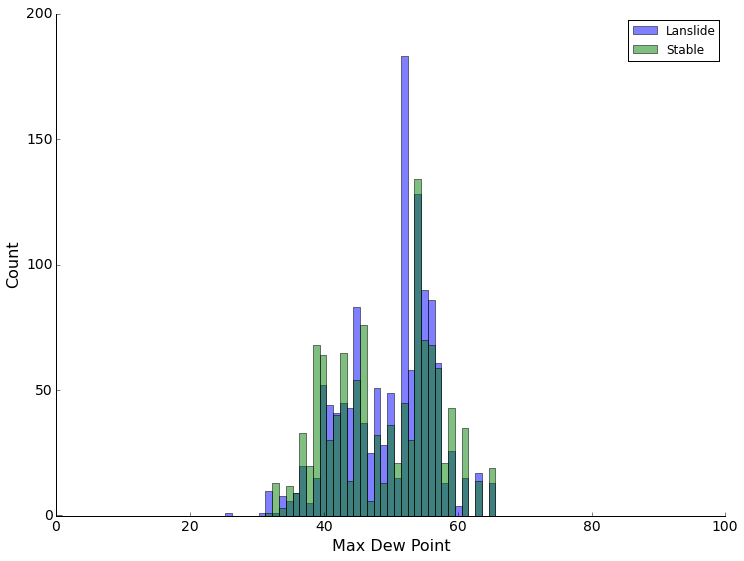

In [81]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Max Dew Point", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 100, 100)

plt.hist(slide['maxdewpti'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['maxdewpti'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

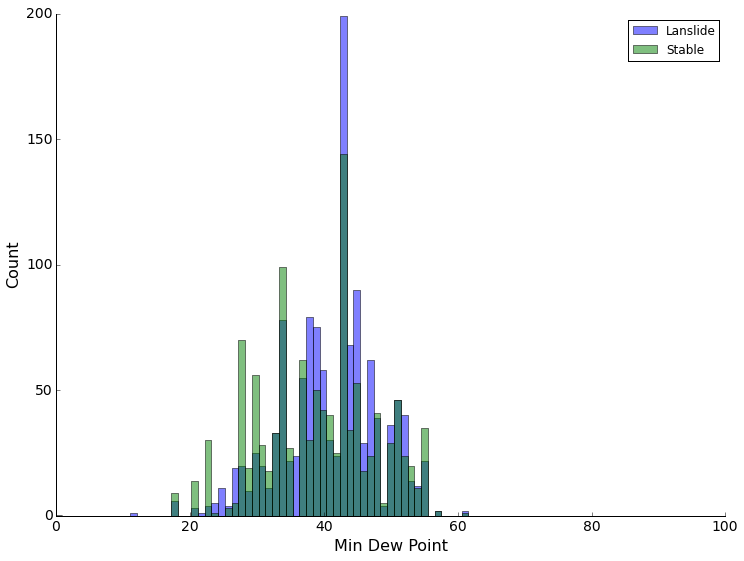

In [82]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Min Dew Point", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 100, 100)

plt.hist(slide['mindewpti'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['mindewpti'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

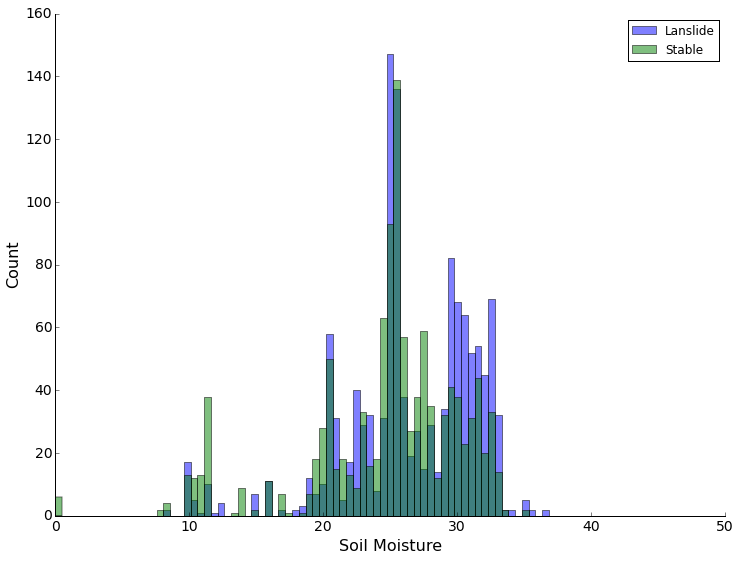

In [85]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Soil Moisture", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 50, 100)

plt.hist(slide['Soil_Moist'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['Soil_Moist'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

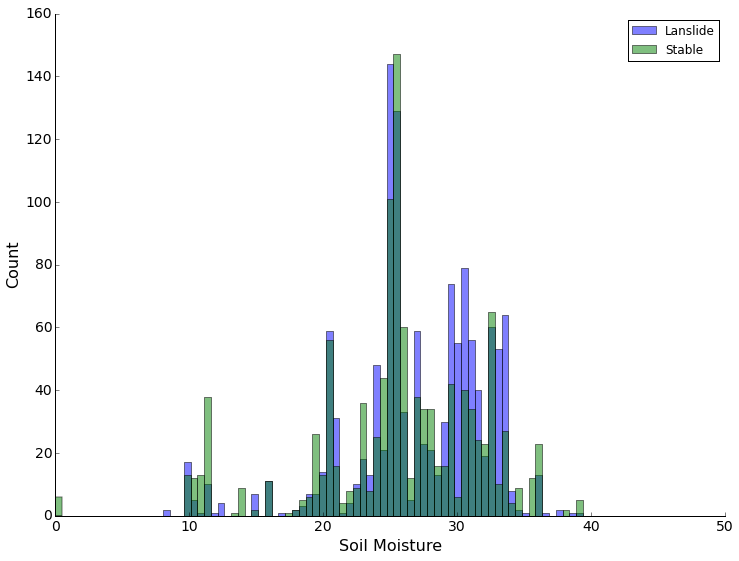

In [86]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Soil Moisture", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 50, 100)

plt.hist(slide['Soil_Moist_Depth'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['Soil_Moist_Depth'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

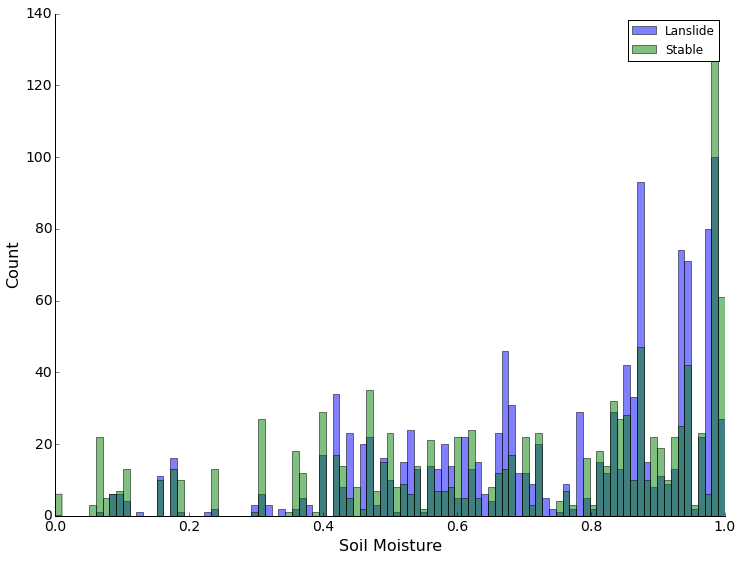

In [88]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Soil Moisture", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

bins = np.linspace(0, 1, 100)

plt.hist(slide['Vegetation'], bins, alpha=0.5, label='Lanslide')
plt.hist(noslide['Vegetation'].values, bins, alpha=0.5, label='Stable')
plt.legend(loc='upper right')

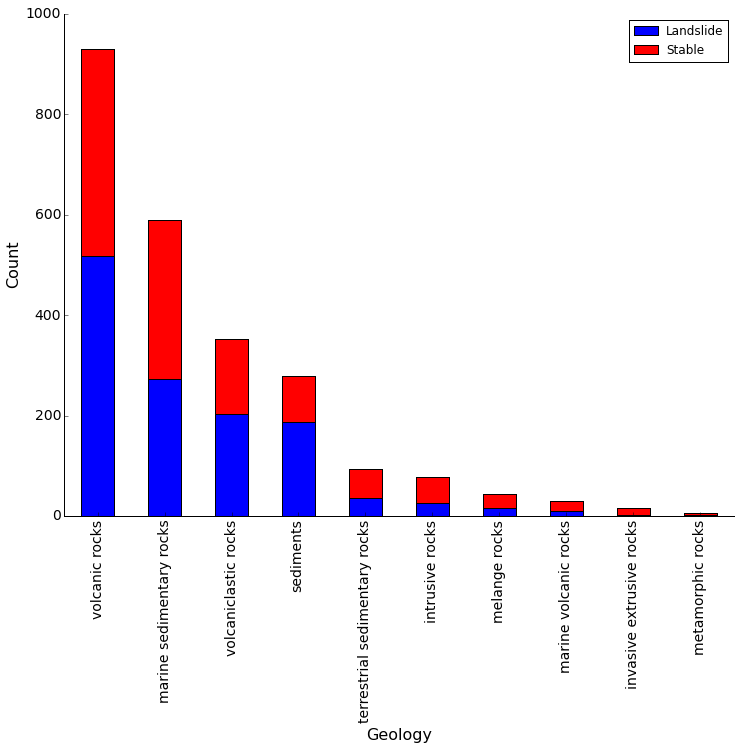

In [93]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
 
plt.xlabel("Geology", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
  
pd.value_counts(slide['GEO_GENL_U']).head(10).plot(kind='bar',label='Landslide')
pd.value_counts(noslide['GEO_GENL_U']).head(10).plot(kind='bar',bottom=pd.value_counts(slide['GEO_GENL_U']).head(10),color='r',label='Stable')
plt.legend(loc='upper right')

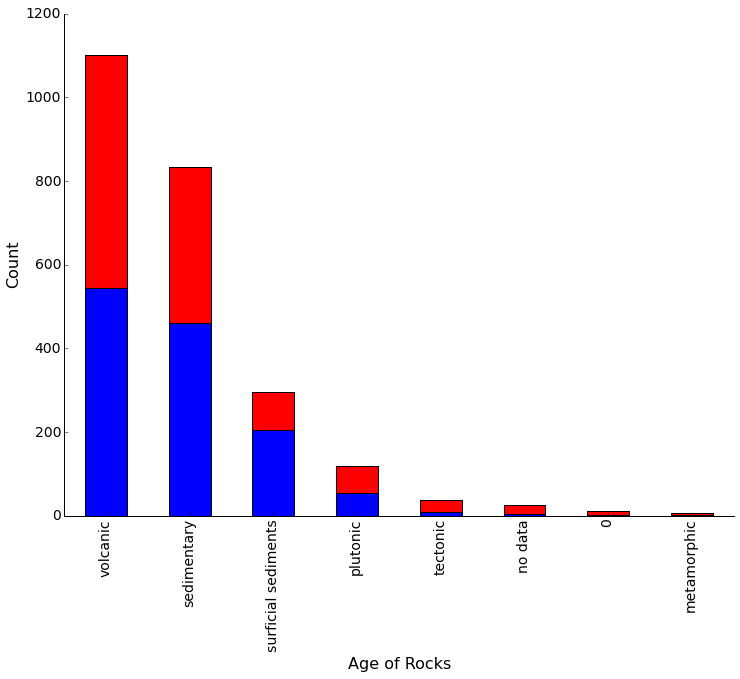

In [95]:
#Set plot size
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
 
plt.xlabel("Age of Rocks", fontsize=16)  
plt.ylabel("Count", fontsize=16)  
  
pd.value_counts(slide['GN_LITH_TY']).head(10).plot(kind='bar')
pd.value_counts(noslide['GN_LITH_TY']).head(10).plot(kind='bar',bottom=pd.value_counts(slide['GN_LITH_TY']).head(10),color='r')